Import Necessary Libraries


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Load and Split the Dataset


In [16]:
iris = load_iris()
X = iris.data #INDEPENDENT
y = iris.target #Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_labeled, X_unlabeled, y_labeled, _= train_test_split(X, y, test_size=0.9, stratify=y)


In [17]:
iris = load_iris(as_frame=True)
print(iris.target.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [18]:
# Convert the NumPy array to a pandas DataFrame
X = pd.DataFrame(X, columns=iris.feature_names)
# Now you can use the .head() method
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# Convert the NumPy array to a pandas DataFrame
X = pd.DataFrame(X, columns=iris.feature_names)
# Now you can use the .head() method
X.head()
# To view the first few elements of the NumPy array y, use slicing
print(y[:5])

[0 0 0 0 0]


Create Two Views of the Data


In [20]:
X1_labeled, X2_labeled = X_labeled[:, :2], X_labeled[:, 2:]
X1_unlabeled, X2_unlabeled = X_unlabeled[:, :2], X_unlabeled[:, 2:]


In [21]:
X1_labeled

array([[5. , 3. ],
       [5.7, 3.8],
       [5. , 3.5],
       [7.1, 3. ],
       [6.7, 3.1],
       [6.1, 2.9],
       [4.8, 3.4],
       [6. , 2.2],
       [5.7, 2.8],
       [6.7, 3.3],
       [5.8, 2.7],
       [6.7, 3.3],
       [7.2, 3. ],
       [5. , 2.3],
       [4.4, 3.2]])

Initialize Classifiers


In [22]:
clf1 = LogisticRegression(max_iter=1000)
clf2 = LogisticRegression(max_iter=1000)

Train Initial Models

In [23]:
clf1.fit(X1_labeled, y_labeled)
clf2.fit(X2_labeled, y_labeled)

LogisticRegression(max_iter=1000)

Co-Training Loop


In [24]:
num_iterations = 10
confidence_threshold = 0.9

for i in range(num_iterations):
    preds_view1 = clf1.predict_proba(X1_unlabeled)
    high_conf_idx1 = np.where(np.max(preds_view1, axis=1) > confidence_threshold)[0]
    new_labels1 = np.argmax(preds_view1[high_conf_idx1], axis=1)

    preds_view2 = clf2.predict_proba(X2_unlabeled)
    high_conf_idx2 = np.where(np.max(preds_view2, axis=1) > confidence_threshold)[0]
    new_labels2 = np.argmax(preds_view2[high_conf_idx2], axis=1)

    X1_labeled = np.vstack((X1_labeled, X2_unlabeled[high_conf_idx2]))
num_iterations = 10
confidence_threshold = 0.9

for i in range(num_iterations):
    preds_view1 = clf1.predict_proba(X1_unlabeled)
    high_conf_idx1 = np.where(np.max(preds_view1, axis=1) > confidence_threshold)[0]
    new_labels1 = np.argmax(preds_view1[high_conf_idx1], axis=1)

    preds_view2 = clf2.predict_proba(X2_unlabeled)
    high_conf_idx2 = np.where(np.max(preds_view2, axis=1) > confidence_threshold)[0]
    new_labels2 = np.argmax(preds_view2[high_conf_idx2], axis=1)

    X1_labeled = np.vstack((X1_labeled, X2_unlabeled[high_conf_idx2]))
    X2_labeled = np.vstack((X2_labeled, X1_unlabeled[high_conf_idx1]))

    y_labeled = np.hstack((y_labeled, new_labels2, new_labels1))

    X1_unlabeled = np.delete(X1_unlabeled, high_conf_idx1, axis=0)
    # Data identified with high confidence in view 2 is removed from the unlabeled view 2 pool
    X2_unlabeled = np.delete(X2_unlabeled, high_conf_idx2, axis=0)

    print(f"Iteration {i+1}: Labeled size = {len(y_labeled)}")
    high_conf_idx1 = np.where(np.max(preds_view1, axis=1) > confidence_threshold)[0]
    new_labels1 = np.argmax(preds_view1[high_conf_idx1], axis=1)

    preds_view2 = clf2.predict_proba(X2_unlabeled)
    high_conf_idx2 = np.where(np.max(preds_view2, axis=1) > confidence_threshold)[0]
    new_labels2 = np.argmax(preds_view2[high_conf_idx2], axis=1)

    X1_labeled = np.vstack((X1_labeled, X2_unlabeled[high_conf_idx2]))
    X2_labeled = np.vstack((X2_labeled, X1_unlabeled[high_conf_idx1]))

    y_labeled = np.hstack((y_labeled, new_labels2, new_labels1))

    X1_unlabeled = np.delete(X1_unlabeled, high_conf_idx1, axis=0)
    # Data identified with high confidence in view 2 is removed from the unlabeled view 2 pool
    X2_unlabeled = np.delete(X2_unlabeled, high_conf_idx2, axis=0)

    print(f"Iteration {i+1}: Labeled size = {len(y_labeled)}")
    # Data identified with high confidence in view 2 is removed from the unlabeled view 2 pool
    X2_unlabeled = np.delete(X2_unlabeled, high_conf_idx2, axis=0)

    print(f"Iteration {i+1}: Labeled size = {len(y_labeled)}")

Iteration 1: Labeled size = 44
Iteration 1: Labeled size = 45
Iteration 1: Labeled size = 45
Iteration 2: Labeled size = 45
Iteration 2: Labeled size = 45
Iteration 2: Labeled size = 45
Iteration 3: Labeled size = 45
Iteration 3: Labeled size = 45
Iteration 3: Labeled size = 45
Iteration 4: Labeled size = 45
Iteration 4: Labeled size = 45
Iteration 4: Labeled size = 45
Iteration 5: Labeled size = 45
Iteration 5: Labeled size = 45
Iteration 5: Labeled size = 45
Iteration 6: Labeled size = 45
Iteration 6: Labeled size = 45
Iteration 6: Labeled size = 45
Iteration 7: Labeled size = 45
Iteration 7: Labeled size = 45
Iteration 7: Labeled size = 45
Iteration 8: Labeled size = 45
Iteration 8: Labeled size = 45
Iteration 8: Labeled size = 45
Iteration 9: Labeled size = 45
Iteration 9: Labeled size = 45
Iteration 9: Labeled size = 45
Iteration 10: Labeled size = 45
Iteration 10: Labeled size = 45
Iteration 10: Labeled size = 45


Evaluate the Model


In [27]:
# Split the test data into the same views as the training data
# X_test is a NumPy array, so remove .values
X1_test, X2_test = X_test[:, :2], X_test[:, 2:]

# Predict using clf1 on the first two features of the test data
y_pred = clf1.predict(X1_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7000


In [28]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


from matplotlib import pyplot as plt
_df_0['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['sepal width (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('sepal width (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['petal width (cm)']
  ys = series['petal length (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('petal length (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['petal width (cm)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'petal width (cm)'}, axis=1)
              .sort_values('petal width (cm)', ascending=True))
  xs = counted['petal width (cm)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('petal width (cm)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('petal width (cm)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['sepal length (cm)'].plot(kind='line', figsize=(8, 4), title='sepal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sepal width (cm)'].plot(kind='line', figsize=(8, 4), title='sepal width (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['petal length (cm)'].plot(kind='line', figsize=(8, 4), title='petal length (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
iris = load_iris(as_frame=True)
df = iris.frame  # Includes features and target

# If you're using only the 'species' column as string:
# Rename 'target' column to 'species' with actual names
df['species'] = df['target'].apply(lambda i: iris.target_names[i])

print("Before encoding:")
print(df[['species']].head())

# Encode the species column
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

print("\nAfter encoding:")
print(df[['species', 'species_encoded']].head())


Before encoding:
  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa

After encoding:
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


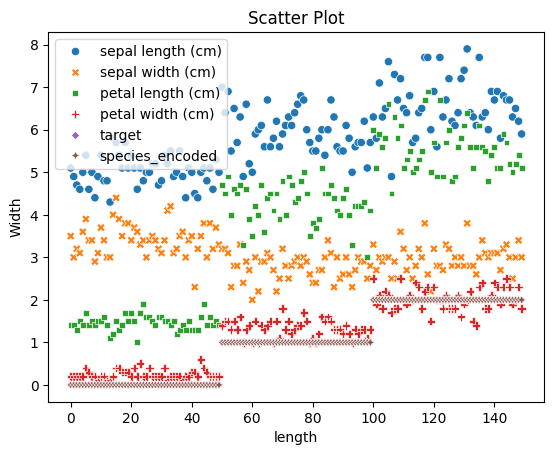

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(df)
plt.title("Scatter Plot")
plt.xlabel("length")
plt.ylabel("Width")
plt.show()